**Problem Statement:** I used to work in one of the top 5 shoe companies in the US. Let’s call it company X. The company X has more than 3000 stores in the US. One of the main issues they faced was, which shoes to keep in the Stores vs warehouse. If the shoes are in the store for more than a particular time and they are not selling, then they would take it back to the warehouse and replace it with different types of shoes.

**Why it is important to solve:** The company X didn’t have a clear solution to this issue.

**What data I am using: I found the following Retail Store Inventory data on Kaggle:-**
https://www.kaggle.com/code/devmbm/inventory-forecasting-with-explanation/input

**Retail Store Inventory Demand Analysis Tasks:**

Here the list of steps that I plan to take:

1. Check Dataset Structure

2. Overview of Data

3. Data Vizualization

4. Analyze Categorical Variables

5. Time Series Demand Forecasting using ARIMA Model

6. Time Series Demand Forecasting using LSTM Model



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/retail_store_inventory.csv')

In [3]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
# Display the structure of the dataset
print("Dataset Structure:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Structure:
Rows: 73100, Columns: 15


In [5]:
# Here are the columns and their datatypes
print(df.dtypes)

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object


In [6]:
# Overview of data
# Summarize the data and identify potential issues in data

df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [7]:
# Find Missing values
# Looks like there is no missing value
print(df.isnull().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


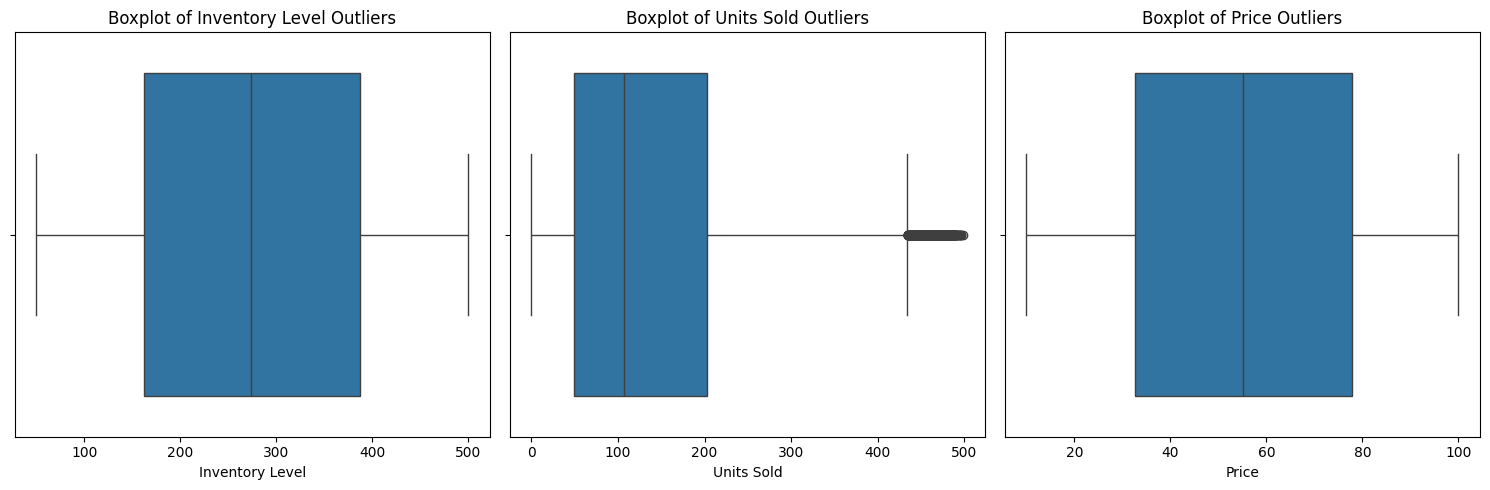

In [10]:
# Let's create a boxplot to show the outliers
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x=df['Inventory Level'])
plt.title('Boxplot of Inventory Level Outliers')

plt.subplot(1,3,2)
sns.boxplot(x=df['Units Sold'])
plt.title('Boxplot of Units Sold Outliers')

plt.subplot(1,3,3)
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price Outliers')

plt.tight_layout()
plt.show()

In [14]:
# Looks like we have outliers in Units Sold. We need to remove outliers
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound, " Upper bound:", upper_bound)

df_no_outliers = df[(df['Units Sold'] >= lower_bound) & (df['Units Sold'] <= upper_bound)]
df = df_no_outliers

Lower bound: -182.0  Upper bound: 434.0


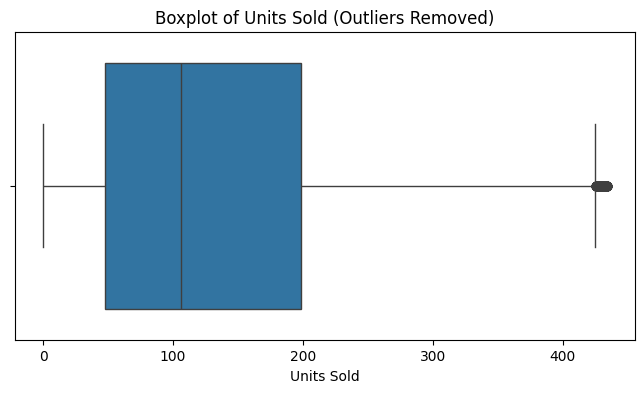

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Units Sold'])
plt.title('Boxplot of Units Sold (Outliers Removed)')
plt.show()

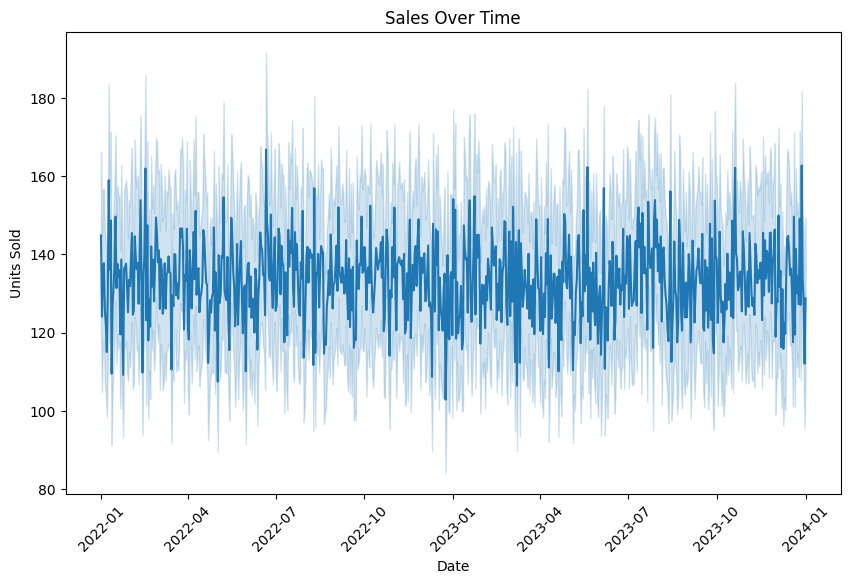

In [16]:
# Data Vizualization
# Let's vizualize the relationships between key variables to identify trends and insights
# a) Sales Over time

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Units Sold', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

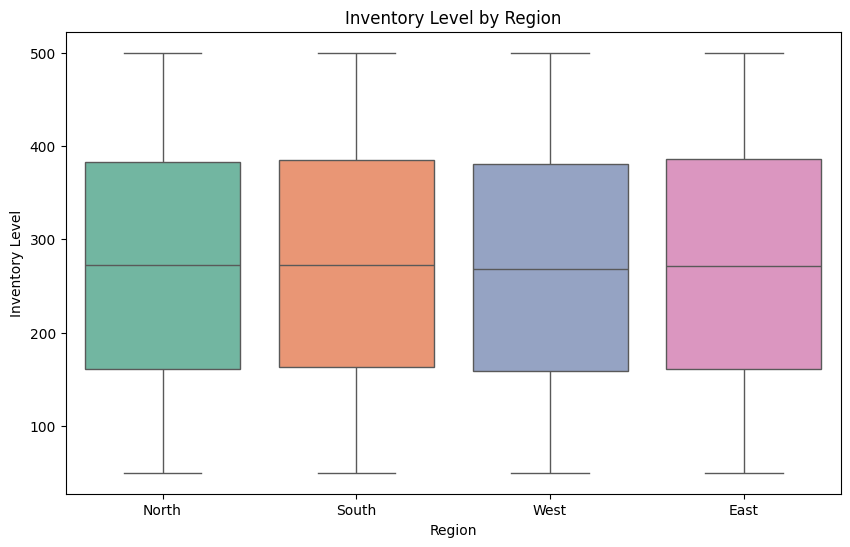

In [19]:
# Let's understand inventory across regions

plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Inventory Level', data=df, palette='Set2')
plt.title('Inventory Level by Region')
plt.xlabel('Region')
plt.ylabel('Inventory Level')
plt.show()

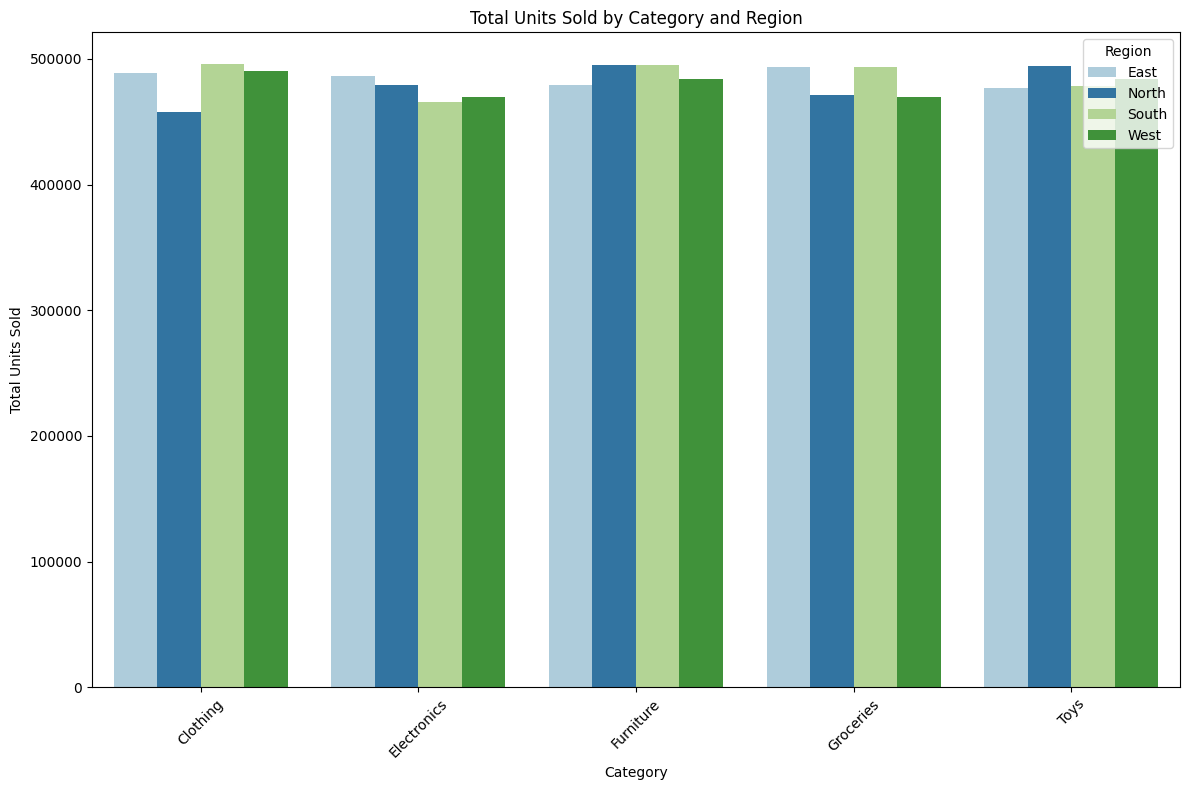

In [22]:
# Let's plot sales by category and region
# Group by Category and Region and sum the Units Sold
sales_by_cat_region = df.groupby(['Category', 'Region'])['Units Sold'].sum().reset_index()

# Plotting the grouped data
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Units Sold', hue='Region', data=sales_by_cat_region, palette='Paired')
plt.title('Total Units Sold by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()